# Data Mining

## Lab 3: Model Linear

Kode pada modul ini sebagian diambil dari Python Data Science Handbook oleh Jake VanderPlas ([In Depth: Linear Regression](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb)).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

## Linear Regression

### Ordinary Least Squares Regression

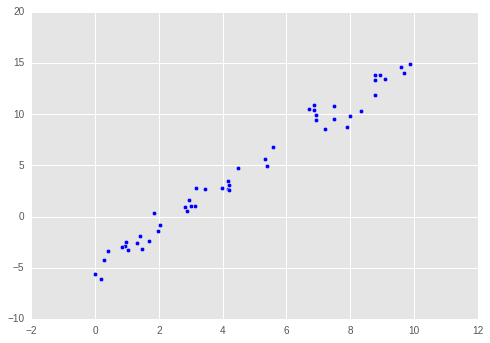

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

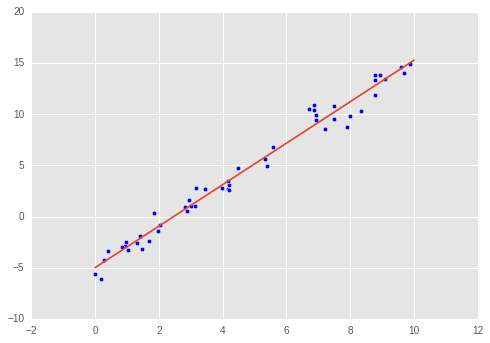

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

('Model slope:    ', 2.0272088103606953)
('Model intercept:', -4.9985770855532037)


### Multidimensional Linear Regression

In [5]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5
[ 1.5 -2.   1. ]


### Basis Function Regression

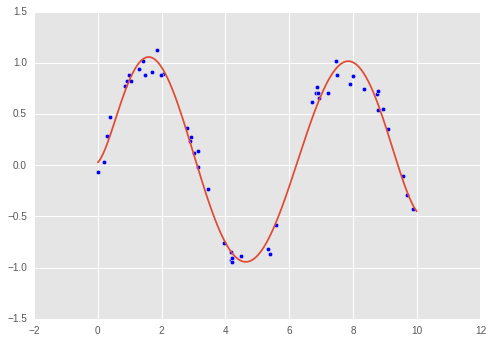

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

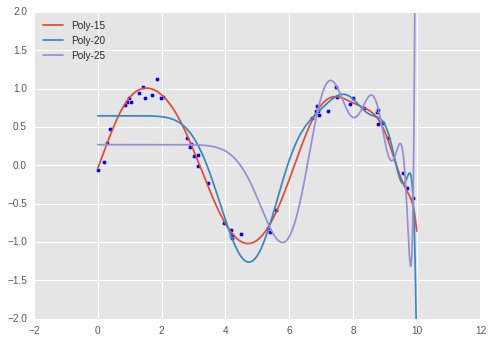

In [7]:
features = [15, 20, 25]

plt.scatter(x, y)
plt.ylim([-2, 2])
for f in features:
    poly_model = make_pipeline(PolynomialFeatures(f),
                               LinearRegression())

    poly_model.fit(x[:, np.newaxis], y)
    yfit = poly_model.predict(xfit[:, np.newaxis])

    plt.plot(xfit, yfit, label='Poly-{}'.format(f))
plt.legend(loc=2)
plt.show()

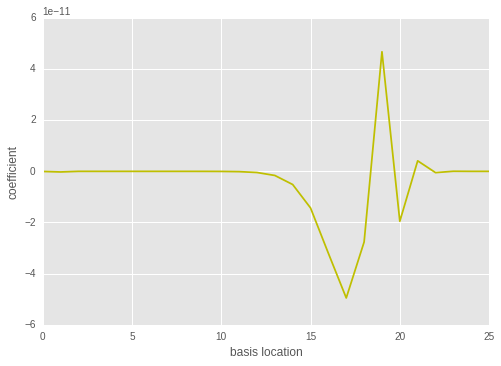

In [8]:
coefs = poly_model.steps[1][1].coef_
plt.plot(range(len(coefs)), coefs, c='y')
plt.xlabel('basis location')
plt.ylabel('coefficient')
plt.show()

### Regularisation

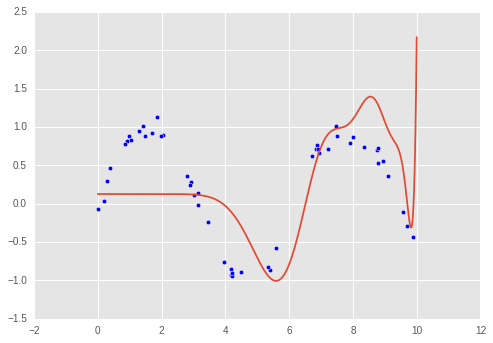

In [9]:
from sklearn.linear_model import Ridge

poly_model = make_pipeline(PolynomialFeatures(25),
                           Ridge(alpha=0.1))

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

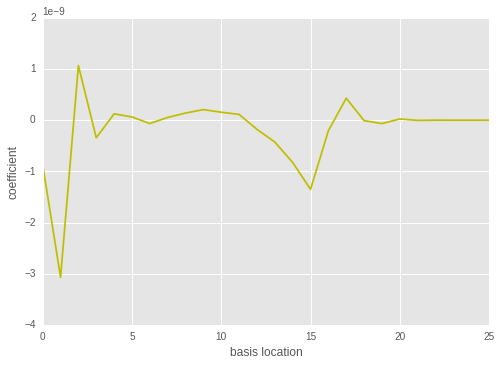

In [10]:
coefs = poly_model.steps[1][1].coef_
plt.plot(range(len(coefs)), coefs, c='y')
plt.xlabel('basis location')
plt.ylabel('coefficient')
plt.show()

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


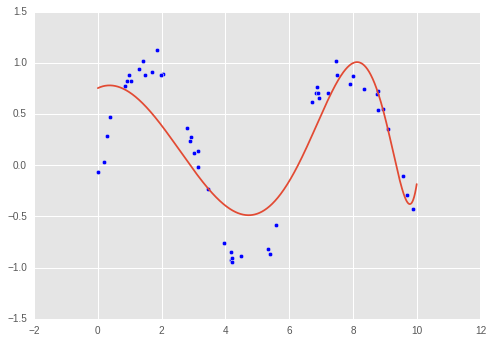

In [11]:
from sklearn.linear_model import Lasso

poly_model = make_pipeline(PolynomialFeatures(25),
                           Lasso(alpha=0.001))

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

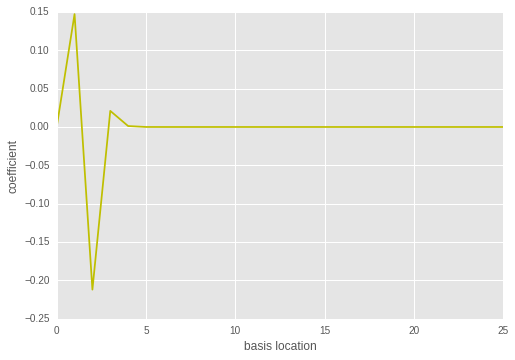

In [12]:
coefs = poly_model.steps[1][1].coef_
plt.plot(range(len(coefs)), coefs, c='y')
plt.xlabel('basis location')
plt.ylabel('coefficient')
plt.show()

## Logistic Regression

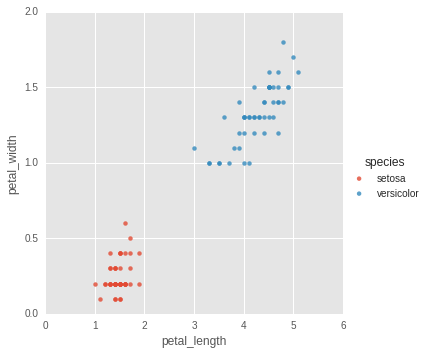

In [13]:
df = sns.load_dataset('iris')
df = df[(df.species == 'setosa') | (df.species == 'versicolor')]
sns.lmplot(x='petal_length', y='petal_width', hue='species', data=df, fit_reg=False);

In [14]:
from sklearn.linear_model import LogisticRegression

X = df[['petal_length', 'petal_width']]
y = df['species']
y = y.map({'setosa': 0, 'versicolor': 1})

clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

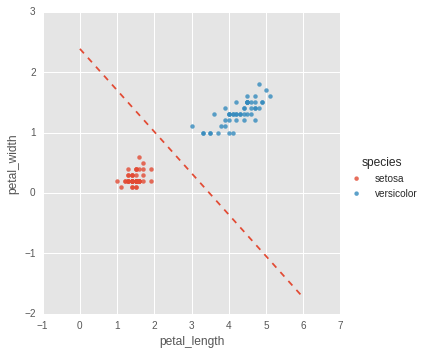

In [15]:
colors = 'rb'

sns.lmplot(x='petal_length', y='petal_width', hue='species', data=df, fit_reg=False)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xmin, xmax)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, ls="--")
plt.show()